# In Depth 3 - Drawing DiHypergraphs

Here we show the fuctionalities and parameters of `xgi.draw_bipartite()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [1]:
import matplotlib.pyplot as plt

import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
diedges = [({0, 1}, {2}), ({1}, {4}), ({2, 3}, {4, 5})]
DH = xgi.DiHypergraph(diedges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x298c62740>,
   <matplotlib.patches.FancyArrowPatch at 0x298e186d0>]))

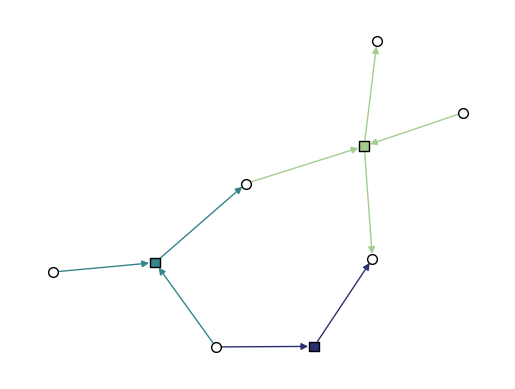

In [3]:
xgi.draw_bipartite(DH)

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_node_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x298bcd960>,
   <matplotlib.patches.FancyArrowPatch at 0x298ed0ac0>]))

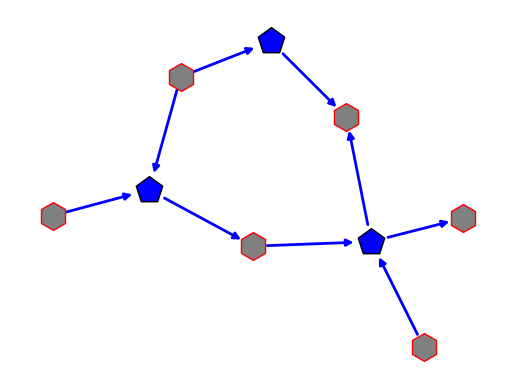

In [4]:
xgi.draw_bipartite(
    DH,
    node_shape="h",
    node_fc="grey",
    node_ec="r",
    node_size=20,
    edge_marker_size=20,
    edge_marker_shape="p",
    dyad_lw=2,
    arrowsize=10,
    edge_marker_fc="b",
    dyad_color="b",
)

Or with multiple values:

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:475: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x298f02950>,
   <matplotlib.patches.FancyArrowPatch at 0x298f6c460>]))

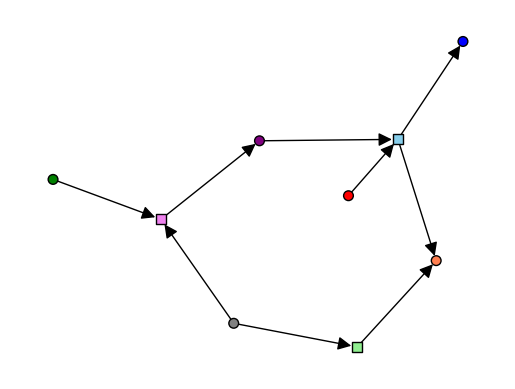

In [5]:
xgi.draw_bipartite(
    DH,
    node_fc=["g", "grey", "purple", "coral", "r", "b"],
    arrowsize=20,
    edge_marker_fc=["violet", "lightgreen", "skyblue"],
    dyad_color="k",
)

Adding node and edge labels:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x298f95cc0>,
   <matplotlib.patches.FancyArrowPatch at 0x298fc8e80>]))

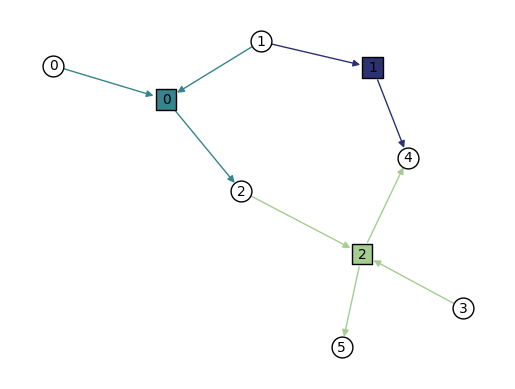

In [6]:
xgi.draw_bipartite(
    DH, node_labels=True, hyperedge_labels=True, node_size=15, edge_marker_size=15
)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

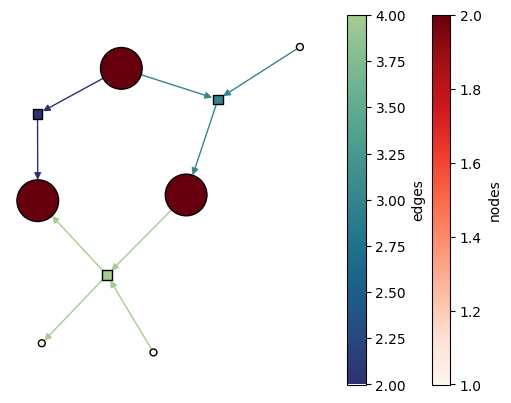

In [7]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_size=DH.nodes.degree,
)

node_coll, edge_marker_coll, dyad_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

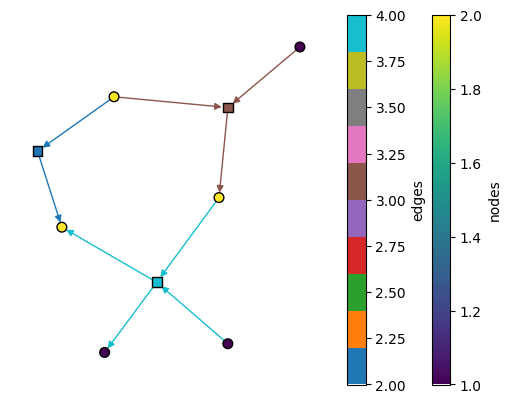

In [9]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_fc_cmap="viridis",
    edge_marker_fc_cmap="tab10",
)

node_coll, edge_marker_coll, dyad_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

## Styling of arrows

By default, the `arrowstyle` used is `"-|>"`:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29a903730>,
   <matplotlib.patches.FancyArrowPatch at 0x29a92d480>]))

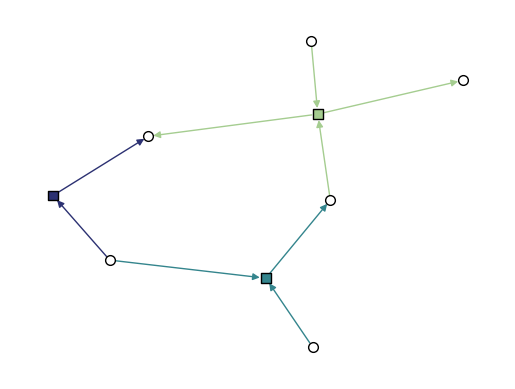

In [10]:
xgi.draw_bipartite(DH, arrowstyle="-|>")

Other styles can be used, see the full list from [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)

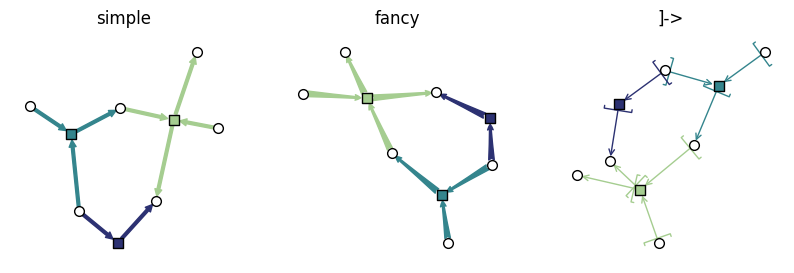

In [11]:
styles = ["simple", "fancy", "]->"]

fig, axs = plt.subplots(1, len(styles), figsize=(10, 3))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, arrowstyle=style, ax=ax)
    ax.set_title(f"{style}")

There is a second argument to style arrows: `connectionstyle`. The default value is `"arc3"`, but other values can be used

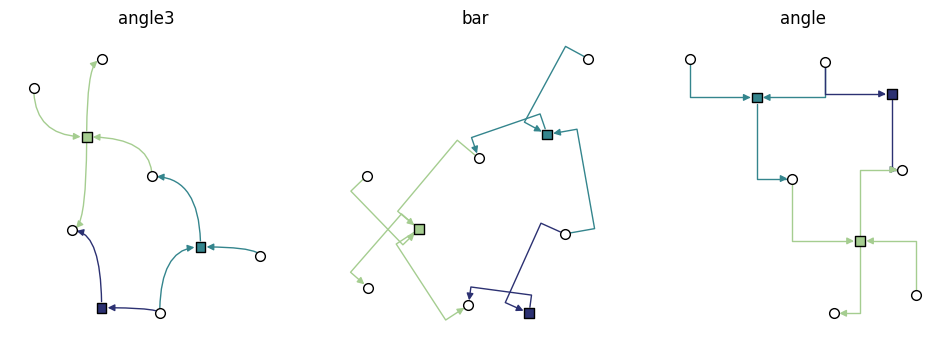

In [12]:
styles = ["angle3", "bar", "angle"]

fig, axs = plt.subplots(1, len(styles), figsize=(12, 4))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, connectionstyle=style, ax=ax)
    ax.set_title(f"{style}")

## Layout

The initial layout is computed based on the original nodes only. After that, the layout can be recomputed based on those original positions, with the edge-nodes starting at the barycenter, to avoid overlap:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29ac842b0>,
   <matplotlib.patches.FancyArrowPatch at 0x29ad63a60>]))

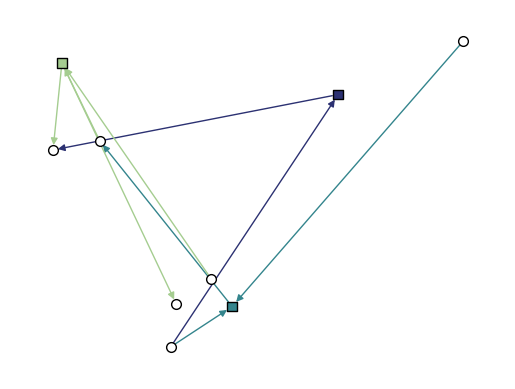

In [15]:
node_pos, edge_pos = xgi.bipartite_spring_layout(DH, iterations=0)
xgi.draw_bipartite(DH, node_pos=node_pos, edge_pos=edge_pos)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29adc4670>,
   <matplotlib.patches.FancyArrowPatch at 0x29adc7460>]))

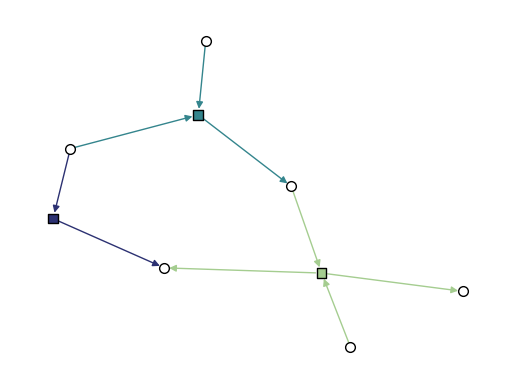

In [16]:
node_pos, edge_pos = xgi.bipartite_spring_layout(DH, iterations=50)
xgi.draw_bipartite(DH, node_pos=node_pos, edge_pos=edge_pos)

A larger example

In [17]:
edges = [
    [[8], [0]],
    [[1, 2], [0]],
    [[0, 3], [1]],
    [[1, 3], [2]],
    [[1, 5], [3]],
    [[2, 5], [4]],
    [[3, 4], [5, 6]],
    [[6, 7], [5]],
    [[5, 8], [6]],
    [[6, 8], [7]],
    [[6, 0], [8]],
    [[7, 0], [9]],
]

DH = xgi.DiHypergraph(edges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29ae2d5a0>,
   <matplotlib.patches.FancyArrowPatch at 0x29ae6b790>]))

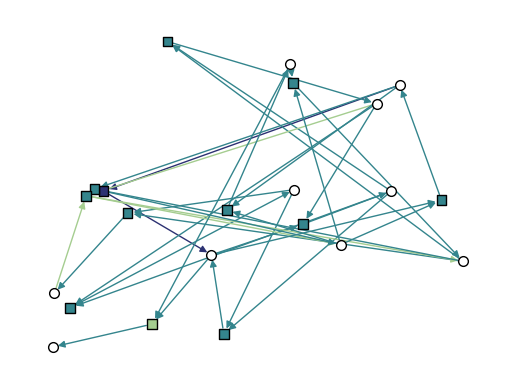

In [18]:
node_pos, edge_pos = xgi.bipartite_spring_layout(DH, iterations=0)
xgi.draw_bipartite(DH, node_pos=node_pos, edge_pos=edge_pos)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29aec6260>,
   <matplotlib.patches.FancyArrowPatch at 0x29c02feb0>]))

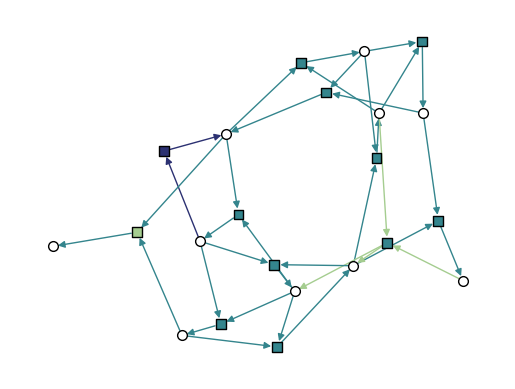

In [19]:
node_pos, edge_pos = xgi.bipartite_spring_layout(DH, iterations=50)
xgi.draw_bipartite(DH, node_pos=node_pos, edge_pos=edge_pos)